# THE SPARKS FOUNDATION - GRIP - Data Science and Business Analytics
## Task 01 : Exploratory  Data Analysis - Retail 
### Author : Prachi Prajapat
## Dataset Used :It can be download from the link https://bit.ly/3i4rbWl

## Problem Statement(s):
###  'Exploratory Data Analysis' on dataset 'SampleSuperstore', finding out the weak areas to work on to make more Profit.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.shape

(9994, 13)

In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Exploratory Data Analysis

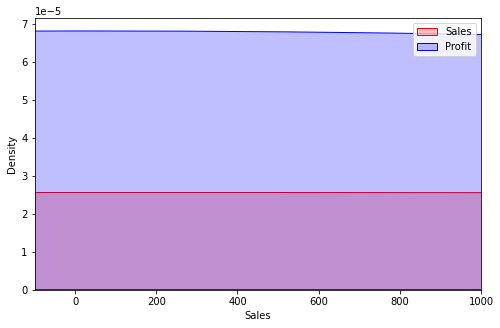

In [8]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='red',label='Sales',shade=True,bw=25)
sns.kdeplot(df['Profit'],color='Blue',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

## Analysis using Pairplot of each column
### [1] Based on the Category

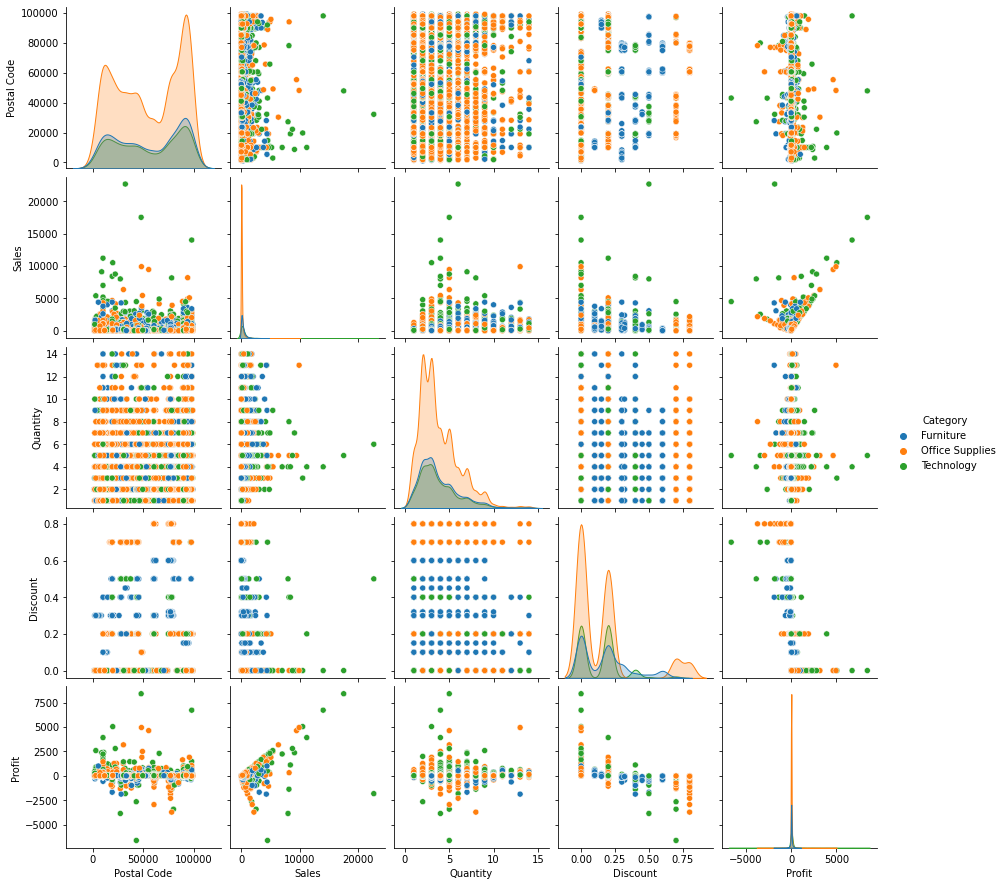

In [9]:
sns.pairplot(df,hue='Category')

In [10]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


## Heatmap for Correlation

<AxesSubplot:>

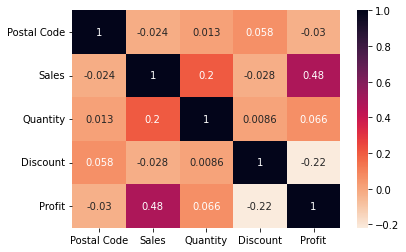

In [11]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

## From above heatmap:
### (1) Sales and Profit are Moderately Correlated.
### (2) Discount and Profit are Negatively Correlated.
### (3) Quality and Profit are less Moderately Correlated. 

## Count plot of each column

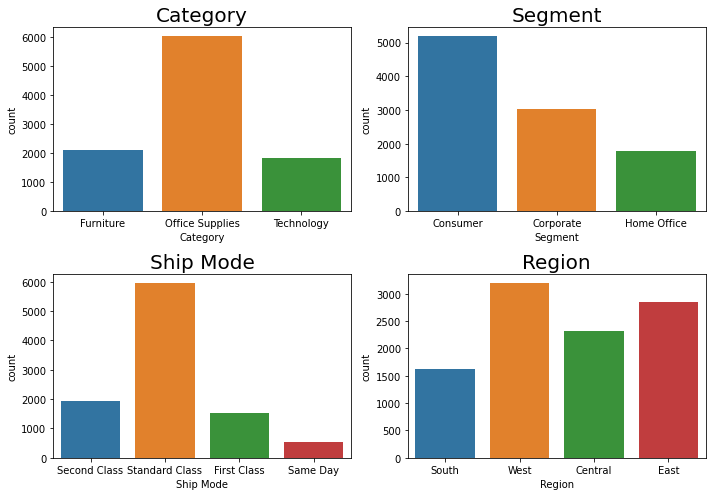

In [12]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)

plt.tight_layout()


Text(0.5, 1.0, 'Sub-Category')

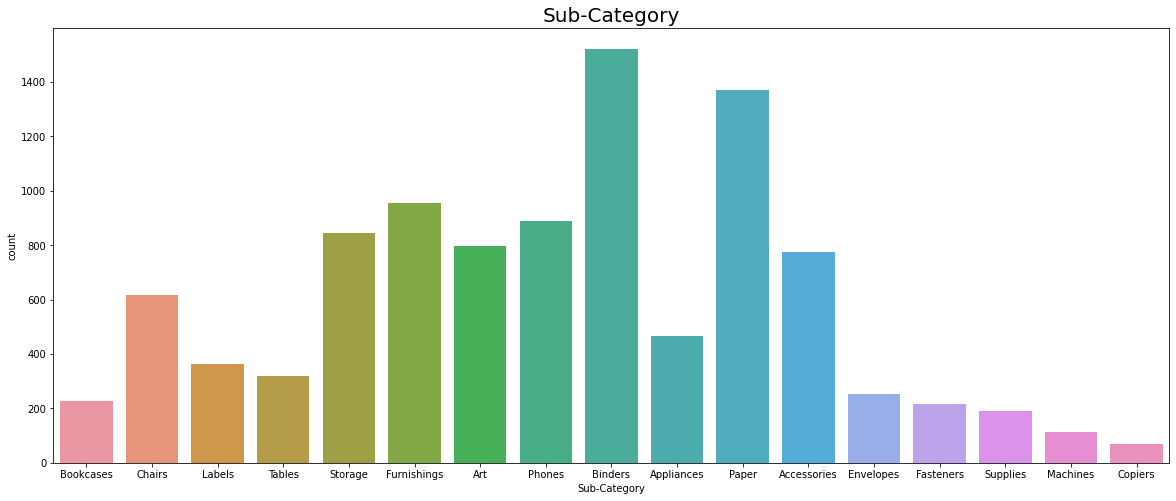

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

Text(0.5, 1.0, 'Quantity')

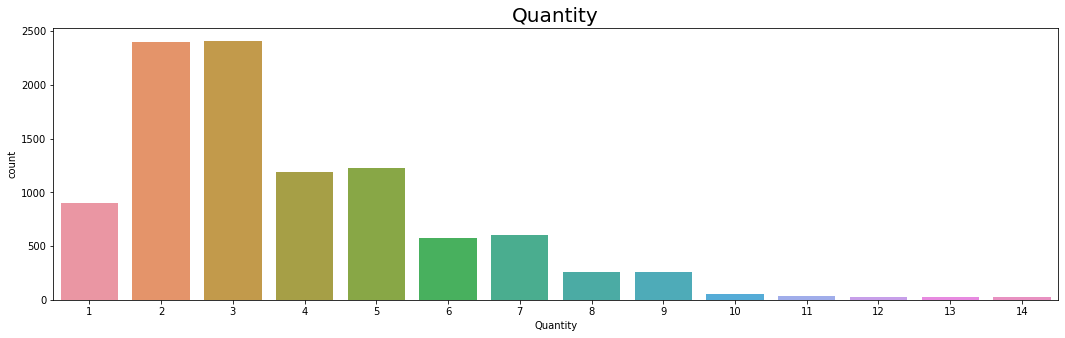

In [14]:
plt.figure(figsize=(18,5))
sns.countplot(df['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

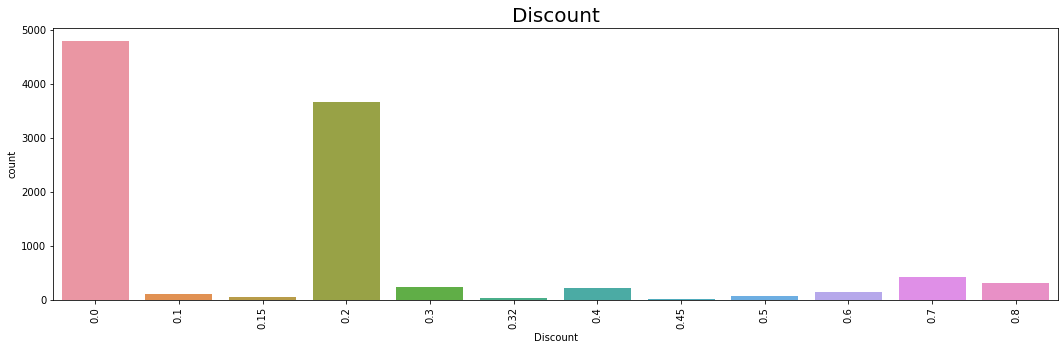

In [15]:
plt.figure(figsize=(18,5))
sns.countplot(df['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

## Distribution of the data using the plot

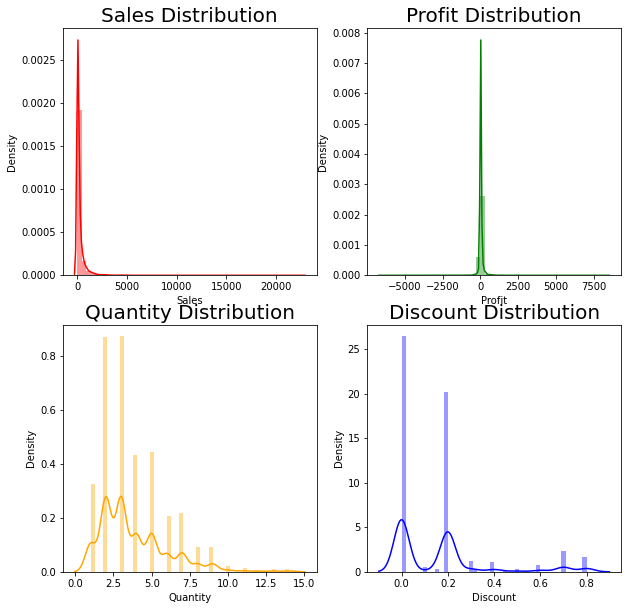

In [16]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.distplot(df['Sales'],color='red',ax=axs[0][0])
sns.distplot(df['Profit'],color='green',ax=axs[0][1])
sns.distplot(df['Quantity'],color='orange',ax=axs[1][0])
sns.distplot(df['Discount'],color='blue',ax=axs[1][1])
axs[0][0].set_title('Sales Distribution',fontsize=20)
axs[0][1].set_title('Profit Distribution',fontsize=20)
axs[1][0].set_title('Quantity Distribution',fontsize=20)
axs[1][1].set_title('Discount Distribution',fontsize=20)
plt.show()

## Statewise Deal Analysis

In [17]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [18]:
df1=df['State'].value_counts()
df1.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

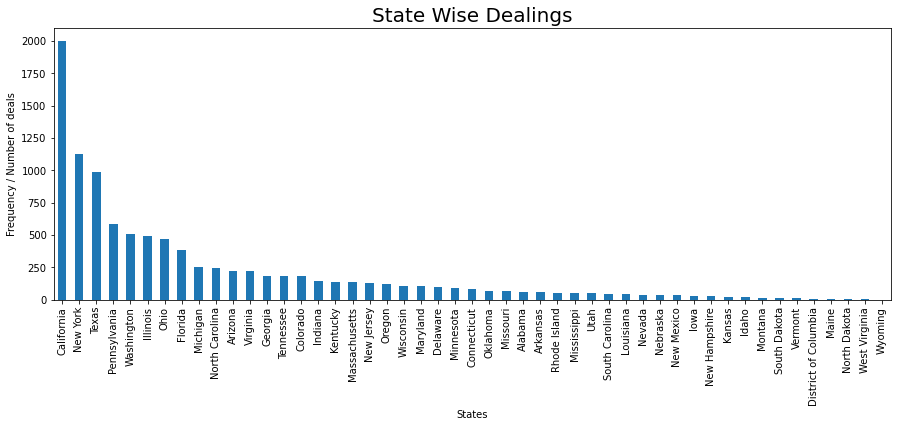

In [19]:
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings',fontsize=20)
plt.show()

## Here is top 3 state where deals are Highest

### [1] California 
### [2] New York  
### [3] Texas              

## Wyoming Lowest Number of deal

In [20]:
df['State'].value_counts().mean()

203.9591836734694

## Average number of deals per state is 204.


## City Wise analysis of the dealing

In [21]:
df2=df['City'].value_counts()
df2=df2.head(50)

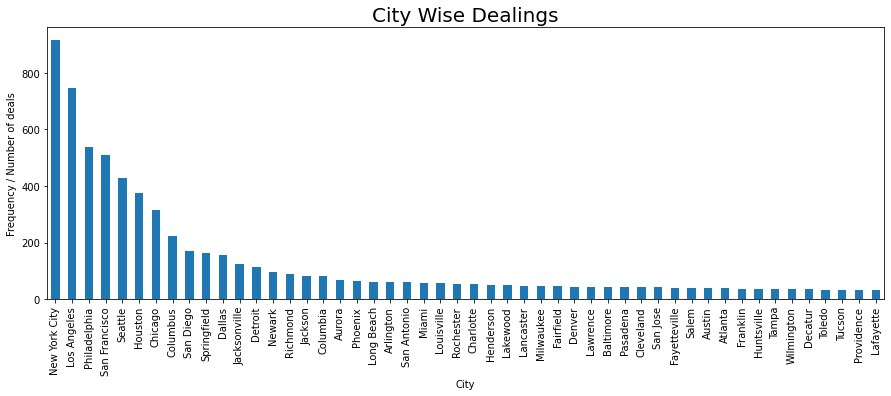

In [22]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings',fontsize=20)
plt.show()

## Top 3 Cities where deals are Highest.

### [1] New York City
### [2] Los Angeles
### [3] Philadelphia

In [23]:
df['City'].value_counts().mean()

18.821092278719398

## Average number of deal per city is 19.

## Segment wise analysis of Profit, Discount and sell

In [24]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [25]:
df_segment=df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()

In [26]:
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment Wise analysis of Sales , Discount and Profit')

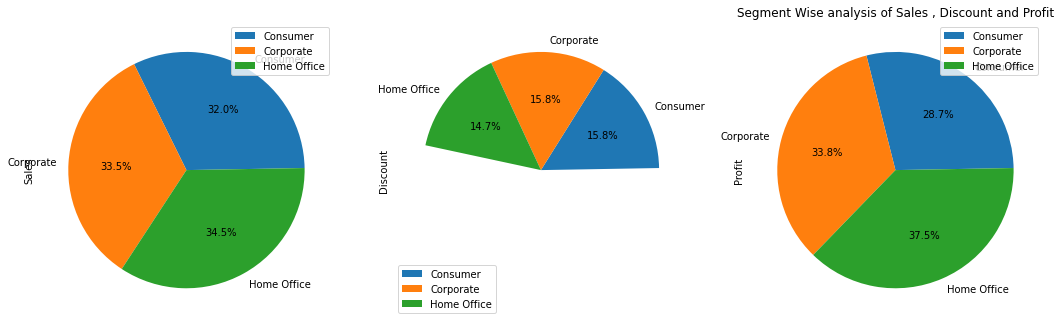

In [27]:
#1. Sales 2. Discount 3. Profit
df_segment.plot.pie(subplots=True,
                    autopct='%1.1f%%',
                   figsize=(18,20),
                   startangle=True,
                   labels=df_segment.index)
plt.title('Segment Wise analysis of Sales , Discount and Profit')


## Sales:

1. Consumer:32%
2. Corporate-33.5%
3. Home Office:34.5%

## Discount:

1. Consumer:15.8%
2. Corporate-15.8%
3. Home Office:14.7%

## Profit

1. Consumer:28.7%
2. Corporate-33.8%
3. Home Office:37.5%


## Statewise analysis of Profit , Discount and Sell

In [28]:
df['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [29]:
df_state=df.groupby(['State'])[['Sales','Discount','Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


## [1] Statewise Profit Analysis

Text(0.5, 1.0, 'State wise Profit Analysis')

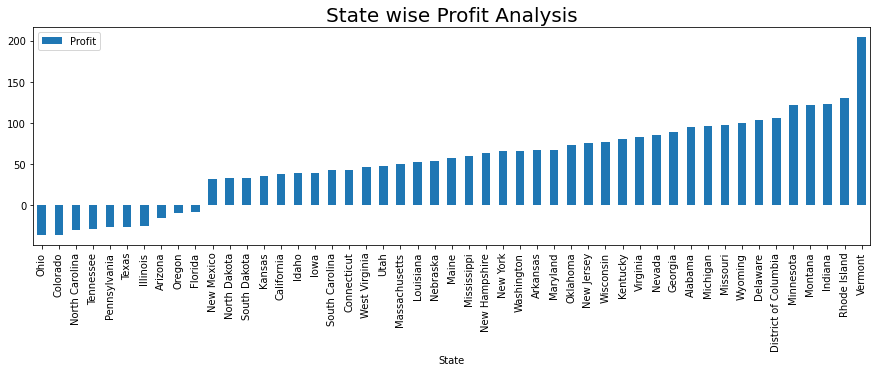

In [30]:
df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind='bar',figsize=(15,4))
plt.title('State wise Profit Analysis',fontsize=20)

## Result
1. Vermont Highest Profit
2. Ohio: Lowest Profit

## [2] Statewise Sale Analysis

Text(0.5, 1.0, 'State wise Analysis of Sales')

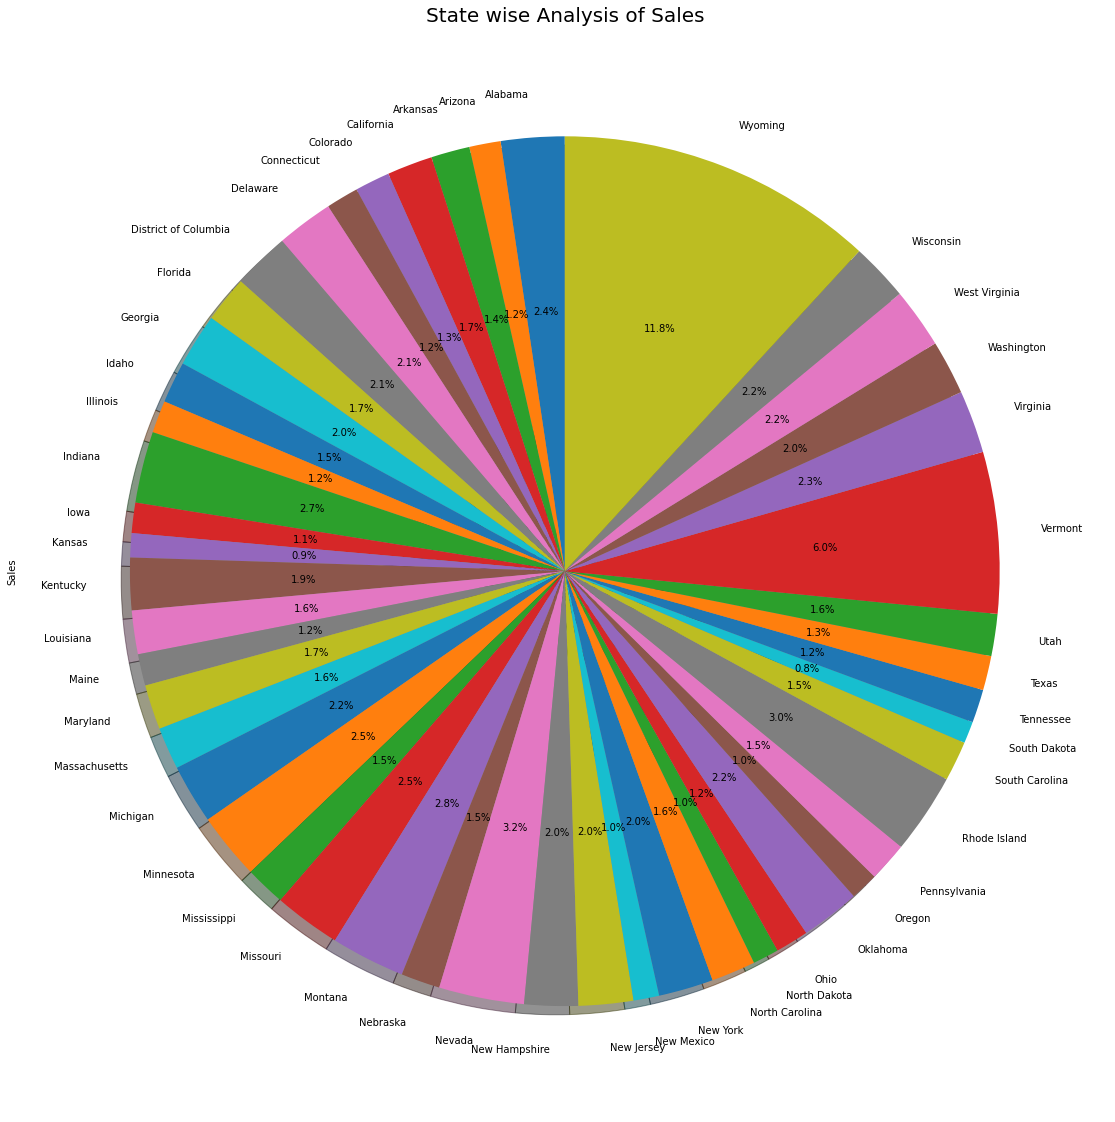

In [31]:
df_state['Sales'].plot(kind='pie',
                      figsize=(20,20),
                      autopct='%1.1f%%',
                      startangle=90,
                      shadow=True)
plt.title('State wise Analysis of Sales',fontsize=20)

## Highest amount of sales = Wyoming(118%) Lowest amount of sales=South Dakota(0.8%)

Text(0.5, 1.0, 'State wise Analysis of Discount')

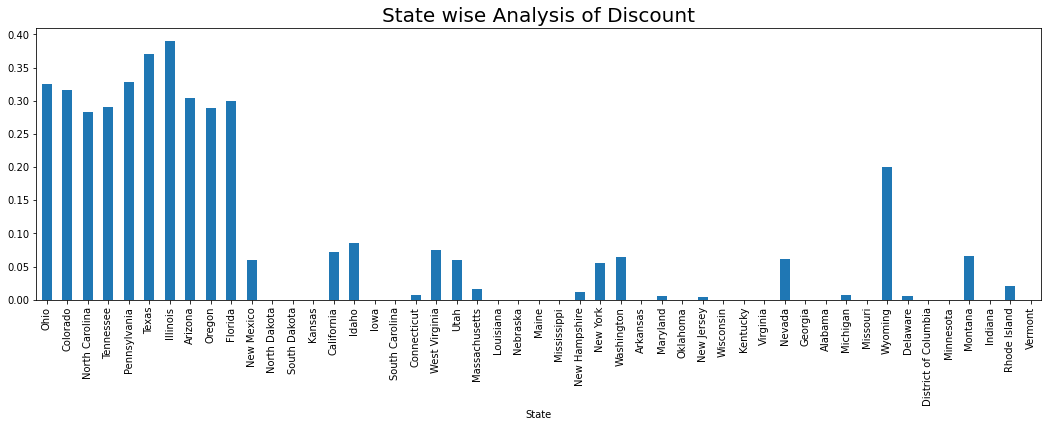

In [32]:
df_state1['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise Analysis of Discount',fontsize=20)

## Illinois at the top

## City wise Analysis of the Profit

In [33]:
df_city=df.groupby(['City'])[['Sales','Discount','Profit']].mean()
df_city=df_city.sort_values('Profit')
df_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'City wise analysis of Sale, Discount , Profit')

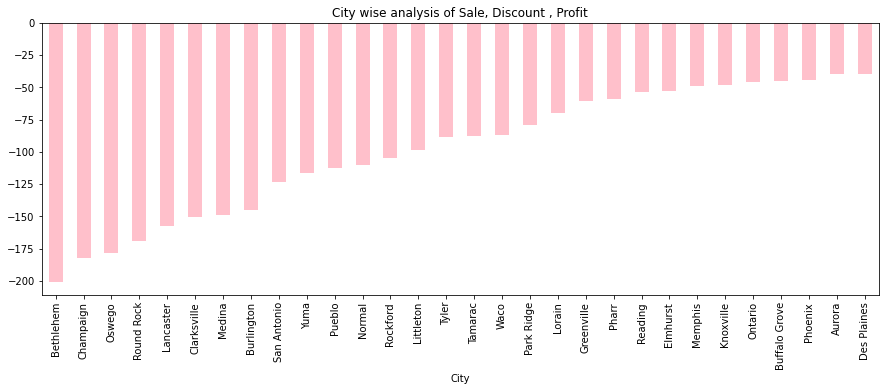

In [34]:
#1. Low Profit
df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color='Pink')
plt.title('City wise analysis of Sale, Discount , Profit')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount , Profit')

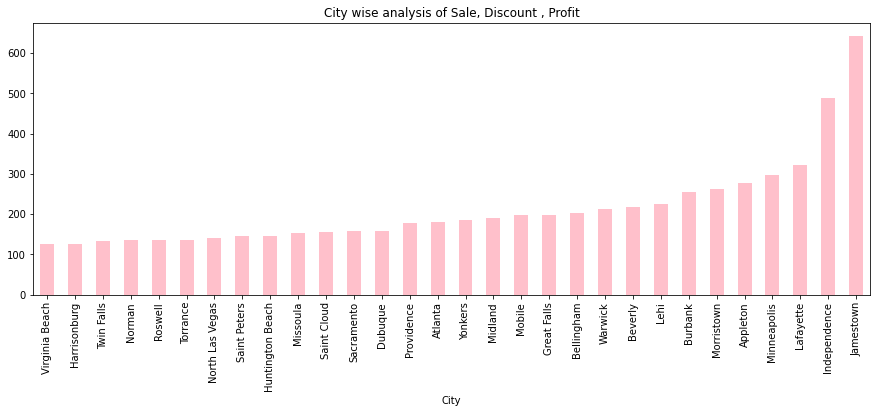

In [35]:
#2. High Profit
df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color='Pink')
plt.title('City wise analysis of Sale, Discount , Profit')

## Quantity wise sales , Profit and Discount Analysis

In [36]:
df_quantity=df.groupby(['Quantity'])[['Sales','Discount','Profit']].mean()
df_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

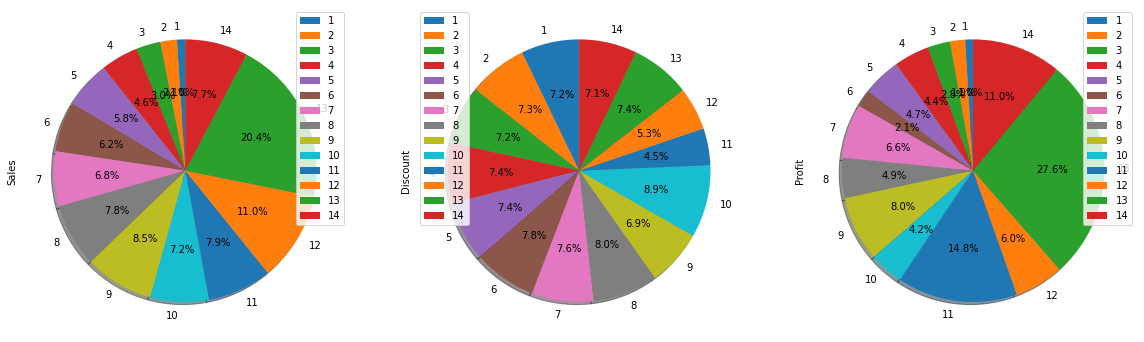

In [37]:
df_quantity.plot.pie(subplots=True,
                      figsize=(20,20),
                      autopct='%1.1f%%',
                      startangle=90,
                      shadow=True)

13 Number of Quantity is high for sales and Profit.

## Category wise Sales Discount and Profit

In [38]:
df_category=df.groupby(['Category'])[['Sales','Discount','Profit']].mean()
df_category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

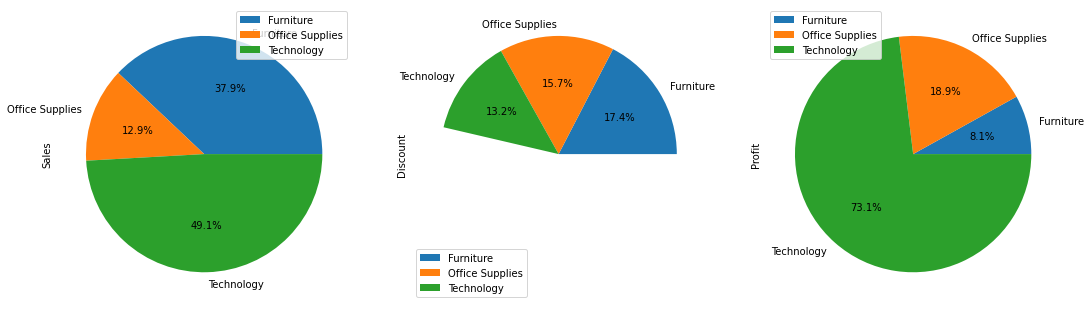

In [39]:
df_category.plot.pie(subplots=True,
                    figsize=(18,20),
                    autopct='%1.1f%%',
                    labels=df_category.index)

Maximum sales and Profit obtain in Technology
Minimum profit obtain in Furniture.

In [40]:
df_sub_category=df.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


## Based on the Sales

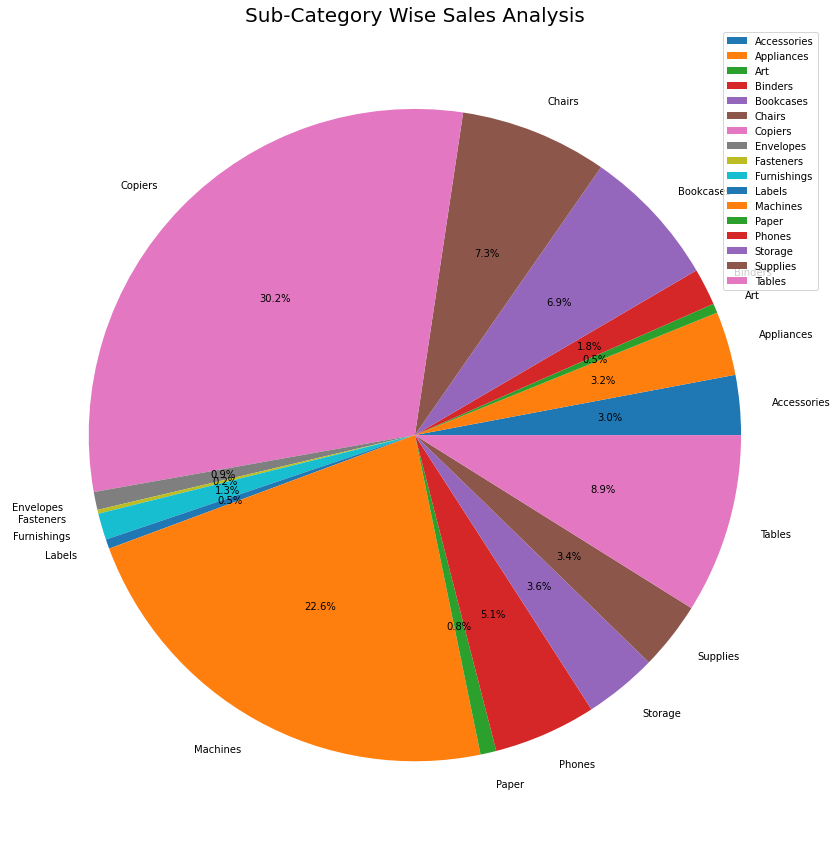

In [41]:
plt.figure(figsize=(15,15))
plt.pie(df_sub_category['Sales'], labels=df_sub_category.index, autopct='%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis',fontsize=20)
plt.legend()
plt.xticks(rotation=90)
plt.show()

Copier then Machine have High sales

## Sub-Category Wise Sales Analysis

## [2] Based on the Discount

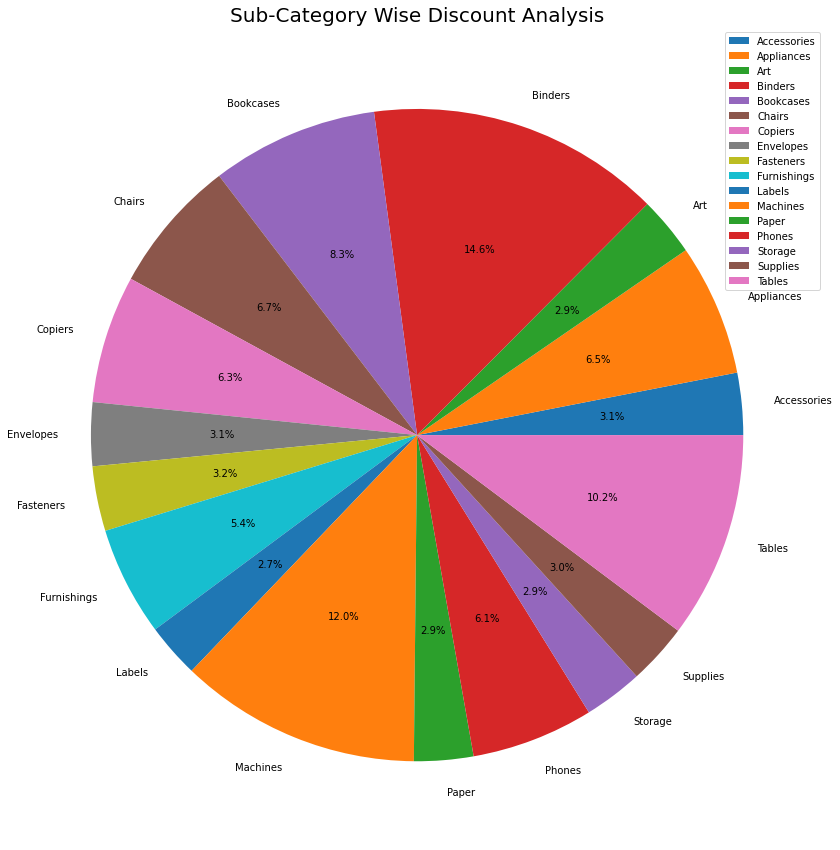

In [42]:
plt.figure(figsize=(15,15))
plt.pie(df_sub_category['Discount'], labels=df_sub_category.index, autopct='%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis',fontsize=20)
plt.legend()
plt.xticks(rotation=90)
plt.show()

## Binders, Machine and then tables have high discount.

### [3] Based on the Profit

<AxesSubplot:xlabel='Sub-Category'>

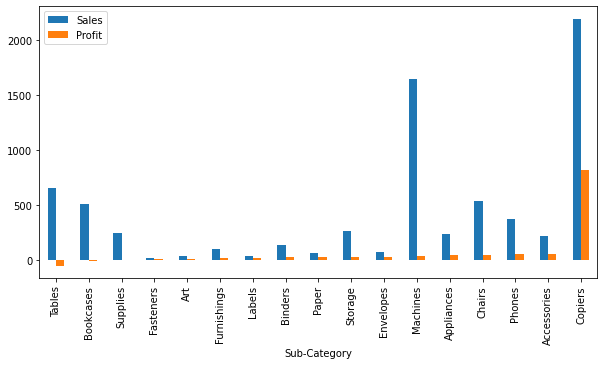

In [43]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize=(10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])

## Copier : Highest Profit as well as sell

## Region Wise Analysis

In [44]:
df_region=df.groupby(['Region'])[['Sales','Discount','Profit']].mean()
df_region

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

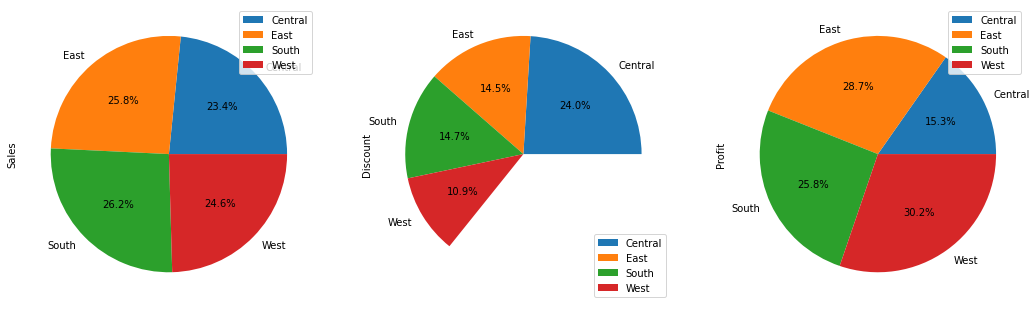

In [45]:
df_region.plot.pie(subplots=True,
                  figsize=(18,20),
                  autopct='%1.1f%%',
                  labels=df_region.index)

## West : Profit is High
## Ship Mode Wise Analysis

In [46]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [50]:
df_shipmode=df.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

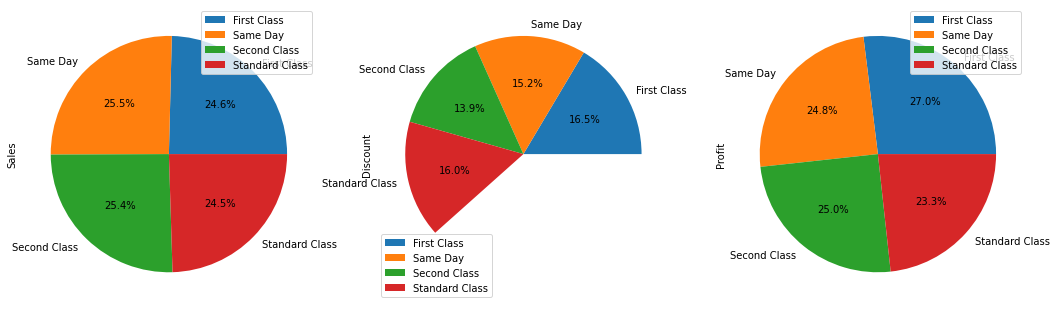

In [52]:
df_shipmode.plot.pie(subplots=True,
                    figsize=(18,20),
                    autopct='%1.1f%%',
                    labels=df_shipmode.index)

### Profit and Discount is high in First Class
### Sales is high for same day ship


## Result and conclusion

### [1] Profit is more than that of sal but there are some areas where profit could be increased
### [2] Profit and Discount is high in First Class
### [3] Sales is high for Same day ship
### [4] Sub-category: Copier: High Profit and Sales
### [5] Sub-category:Binders, Machines and thentabels have high Discount.
### [6] Category: Maximum sales and Profit obtain in Technology.
### [7] Category: Minimum profit obtain in Furniture.
### [8] State: Vermont: Highest Profit
### [9] State: Ohio: Lowest Profit
### [10] Segment: Home-office: High Profit & sales.

### [11] Here is top 3 city where deals are Highest.
#### 1. New York City
#### 2. Los Angeles
#### 3. Philadelphia

### [12] Sales and Profit are Modertely Correlated.

### [13] Here is top 3 State where deals are Highest.
#### 1. California
#### 2. New York 
#### 3. Taxes

### [14] Wyoming: Lowest Number of deal, Highest amount of sales=Wyoming(11.8%)
### [15] Lowest amount of Sales = South Dakota(0.8)

# THANK YOU!
